In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, random, datetime

In [2]:
df_login = pd.read_json('logins.json')

In [3]:
df_login.head(1)

,login_time
0,1970-01-01 20:13:18


In [4]:
df_login.set_index('login_time',inplace=True)
df_login['count'] = 1
df_login=df_login.resample("15T").agg({'count':'sum'})

In [5]:
df_login.head(5)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
df_login.tail(5)

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


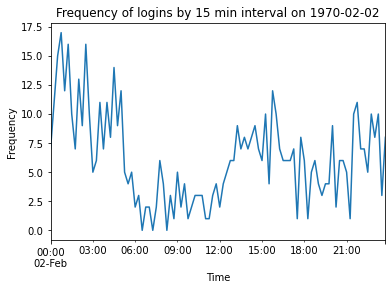

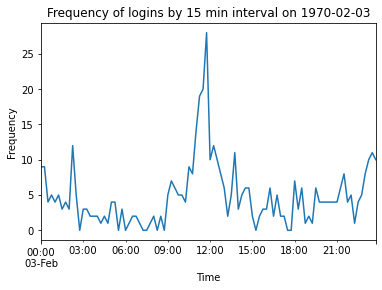

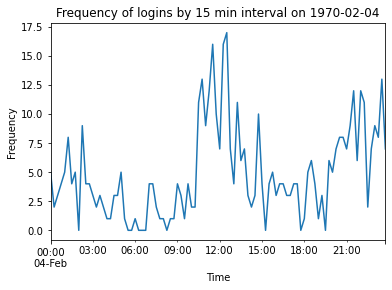

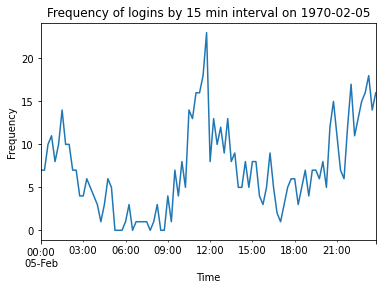

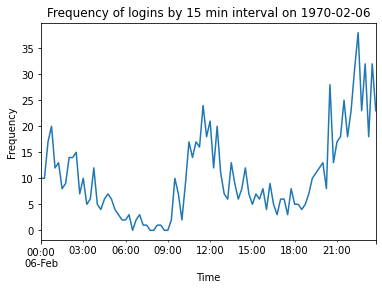

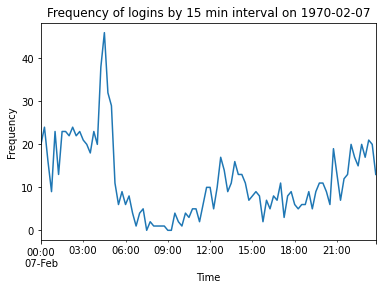

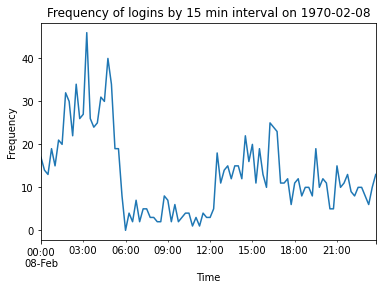

In [7]:
# Let's monitor the log-in of some days

for day in ["1970-02-02", "1970-02-03", "1970-02-04", "1970-02-05", "1970-02-06","1970-02-07", "1970-02-08"]:
    df_login.loc[day].plot(legend = None)
    plt.title("Frequency of logins by 15 min interval on {0}".format(day))
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

For most of the days analyzed, there seems to be 2 spikes, from the noon to early afternoon and from evening to midnight. For the anomalous day of Feb 7th and 8th, there are a lot of logins in the very early morning with very few logins throughout the rest of the day. 

In [8]:
df1=df_login.reset_index()

# Weekly cycles

In [9]:
# Plot frequency for each month (since visualization is jaggy for all months)
df1['month'] = pd.DatetimeIndex(df1['login_time']).month
df1.head()

,login_time,count,month
0,1970-01-01 20:00:00,2,1
1,1970-01-01 20:15:00,6,1
2,1970-01-01 20:30:00,9,1
3,1970-01-01 20:45:00,7,1
4,1970-01-01 21:00:00,1,1


In [10]:
df1['weekday'] = pd.DatetimeIndex(df1['login_time']).weekday
df1.head()

,login_time,count,month,weekday
0,1970-01-01 20:00:00,2,1,3
1,1970-01-01 20:15:00,6,1,3
2,1970-01-01 20:30:00,9,1,3
3,1970-01-01 20:45:00,7,1,3
4,1970-01-01 21:00:00,1,1,3


In [11]:
df1['day'] = pd.DatetimeIndex(df1['login_time']).day
df1.head()

,login_time,count,month,weekday,day
0,1970-01-01 20:00:00,2,1,3,1
1,1970-01-01 20:15:00,6,1,3,1
2,1970-01-01 20:30:00,9,1,3,1
3,1970-01-01 20:45:00,7,1,3,1
4,1970-01-01 21:00:00,1,1,3,1


In [12]:
df1.sort_values(by=['count'], ascending=False)

,login_time,count,month,weekday,day
5602,1970-03-01 04:30:00,73,3,6,1
8870,1970-04-04 05:30:00,66,4,5,4
8854,1970-04-04 01:30:00,64,4,5,4
8853,1970-04-04 01:15:00,63,4,5,4
8654,1970-04-01 23:30:00,60,4,2,1
...,...,...,...,...,...
919,1970-01-11 09:45:00,0,1,6,11
4369,1970-02-16 08:15:00,0,2,0,16
2450,1970-01-27 08:30:00,0,1,1,27
2449,1970-01-27 08:15:00,0,1,1,27


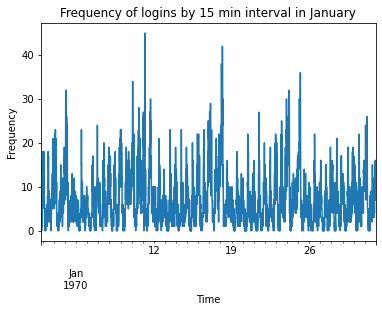

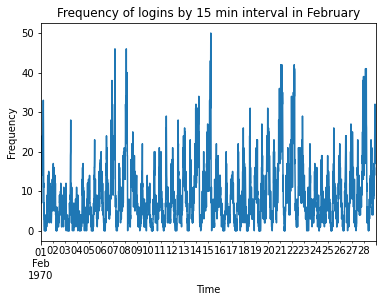

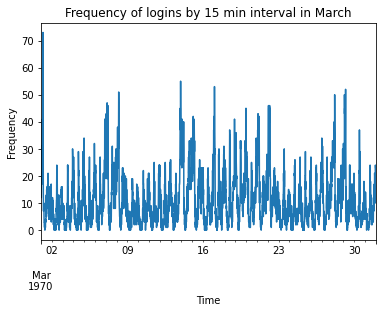

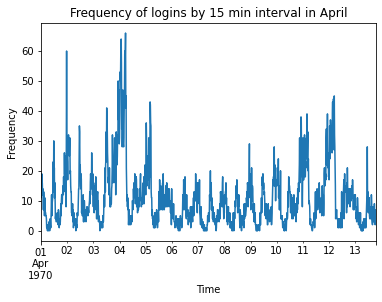

In [13]:
# Plot frequency for each month (since visualization is jaggy for all months)
m_dict = {1:"January",
         2: "February",
         3: "March",
         4: "April"}

for month in [1, 2, 3, 4]:
    df_login[df_login.index.month == month].plot(legend = None)
    plt.title("Frequency of logins by 15 min interval in {0}".format(m_dict[month]))
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

In [14]:
df1[(df1['month']==1) & (df1['day']==11)]

,login_time,count,month,weekday,day
880,1970-01-11 00:00:00,12,1,6,11
881,1970-01-11 00:15:00,7,1,6,11
882,1970-01-11 00:30:00,16,1,6,11
883,1970-01-11 00:45:00,18,1,6,11
884,1970-01-11 01:00:00,26,1,6,11
...,...,...,...,...,...
971,1970-01-11 22:45:00,6,1,6,11
972,1970-01-11 23:00:00,2,1,6,11
973,1970-01-11 23:15:00,6,1,6,11
974,1970-01-11 23:30:00,8,1,6,11


From the graph, the first spike of January is on the 11th day, which is on day 6 (Sunday). Login increases during the weekends because of the spike seen 

# Predictive modelling

In [15]:
with open("ultimate_data_challenge.json") as json_file:
    json_data = json.load(json_file)

print(json_data[0])

{'city': "King's Landing", 'trips_in_first_30_days': 4, 'signup_date': '2014-01-25', 'avg_rating_of_driver': 4.7, 'avg_surge': 1.1, 'last_trip_date': '2014-06-17', 'phone': 'iPhone', 'surge_pct': 15.4, 'ultimate_black_user': True, 'weekday_pct': 46.2, 'avg_dist': 3.67, 'avg_rating_by_driver': 5.0}


In [16]:
df = pd.DataFrame(json_data)

print(df.shape)
print(df.info())
print(df.describe())

(50000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
       trips_in_first_30_days  avg_rating_of_driver     avg_s

In [17]:
#drop rows with no phone information, since we cannot infer that without building a predictive model
df = df.drop(df[df.phone.isna()==True].index,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [18]:
#convert to timestamp
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [19]:
#set current date 
current_date = df['last_trip_date'].max()

In [20]:
df['avg_rating_by_driver'].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [21]:
df['avg_rating_of_driver'].describe()

count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [22]:
#fill missing values by averaging the mean and median
fill_val = (4.777861+5) / 2
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=fill_val)

#fill missing values with median value
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=4.9)

In [23]:
#find if user qualifies as active
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [24]:
#create dummy variables for categorical features
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
df_features.head()
#set target and drop unuseful columns
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)

<AxesSubplot:xlabel='active', ylabel='avg_dist'>

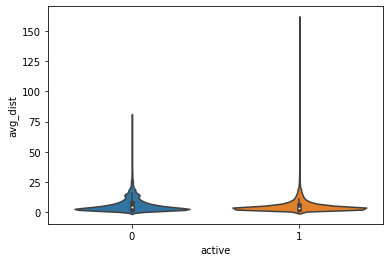

In [25]:
#visualize difference in average distance by activity of user
sns.violinplot(data=df,x='active',y='avg_dist')

In [26]:
pd.pivot_table(df,index='active',aggfunc={'avg_dist':['mean','std']})

avg_dist          
            mean       std
active                    
0       6.190725  6.184010
1       5.113930  4.617779

(3.5, 5.2)

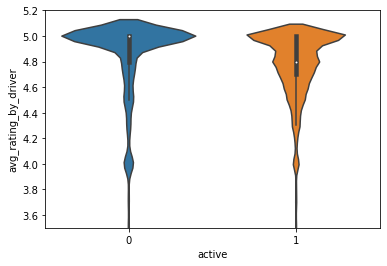

In [27]:
sns.violinplot(data=df,x='active',y='avg_rating_by_driver')
plt.ylim([3.5,5.2])

In [28]:
pd.pivot_table(df,index='active',aggfunc={'avg_rating_by_driver':['median','std']})

avg_rating_by_driver          
                     median       std
active                               
0                       5.0  0.503901
1                       4.8  0.328753

In [29]:
df.active.value_counts(normalize=True)*100

0    62.35989
1    37.64011
Name: active, dtype: float64

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [31]:
#scale data
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [32]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [33]:
#build random forest model with 1000 estimators
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [34]:
rf.score(X_test,y_test)

0.7507307731075497

In [35]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.75415617 0.74798387 0.7515121  0.74445565 0.74697581]
Mean Cross Validated Score: 0.7486136446737629


In [36]:
df_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),index=range(df_features.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.300898
4,weekday_pct,0.133297
6,avg_rating_by_driver,0.111208
3,surge_pct,0.081309
0,trips_in_first_30_days,0.080781
1,avg_rating_of_driver,0.080508
2,avg_surge,0.066213
8,city_King's Landing,0.046819
10,phone_Android,0.020178
11,phone_iPhone,0.019245


In [37]:
#more metrics for our model
precision_recall_fscore_support(y_test,y_pred)

(array([0.80139091, 0.66693419]),
 array([0.79919355, 0.66998119]),
 array([0.80029072, 0.66845422]),
 array([6200, 3721]))

In [38]:
#weighted metrics
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.7509611696663278, 0.7507307731075497, 0.7508437264681503, None)

In [39]:
#generate confusion matrix
confusion_matrix(y_test,y_pred)

array([[4955, 1245],
       [1228, 2493]])

In [40]:
#initialize model
logit = LogisticRegression(solver='lbfgs')
#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}
#instantiate and fit grid search object
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [41]:
grid.best_estimator_.C

3.0999999999999996

In [42]:
#find coefficients from Logistic Regression
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(df_features.columns),logit_coef.coef_[0]),index=range(df_features.columns.shape[0]),columns=['feature','coefficient'])
df_coef

,feature,coefficient
0,trips_in_first_30_days,0.083191
1,avg_rating_of_driver,-0.464593
2,avg_surge,2.414756
3,surge_pct,-1.349327
4,weekday_pct,-0.243244
5,avg_dist,0.161589
6,avg_rating_by_driver,-1.326186
7,city_Astapor,-0.759905
8,city_King's Landing,1.132577
9,city_Winterfell,-0.243728


In [43]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))

0.7423646095717883


Average distance: This one is tricky because while our logistic regression model shows that an increase in average distance per trip in the first 30 days increases our chances of being an active user, interestingly, the mean avg_dist is larger for inactive riders than for active. Due to this ambiguity in the data, it may not be advisable to try to increase the distance of trips taken in the first 30 days.

weekday percentage: The chance of being an active user decrease as the percentage of week day use goes up. From this we can see that encouraging people to use the app on the weekend will be beneficial for the company revenue.

average rating by driver: For this feature, there is a decreased likelihood of being an active user as your rating goes up.

trips in the first 30 days: As the number of trips in the first 30 days increases, so does the chance that a rider is active after 6 months.